In [21]:
import json
import numpy as np 
import matplotlib.pyplot as plt
import glob
import pandas as pd
import json
import pickle

In [22]:
tests = glob.glob('../ray_tune_results/*')

In [24]:
tests


['../ray_tune_results/run_lightning_50_desire_advantage=True,desire_cum_rew=False,desire_discounted_rew_to_go=True,desire_horizon=True,desire_state=Fals_2020-08-17_21-50-04rf8jmfc_',
 '../ray_tune_results/run_lightning_51_desire_advantage=False,desire_cum_rew=False,desire_discounted_rew_to_go=True,desire_horizon=True,desire_state=Fal_2020-08-17_21-50-04cyejkyms',
 '../ray_tune_results/run_lightning_45_desire_advantage=False,desire_cum_rew=True,desire_discounted_rew_to_go=False,desire_horizon=False,desire_state=Tr_2020-08-17_21-50-03qxzpteew',
 '../ray_tune_results/run_lightning_61_desire_advantage=False,desire_cum_rew=True,desire_discounted_rew_to_go=False,desire_horizon=False,desire_state=Fa_2020-08-17_21-50-04mo_wbx_w',
 '../ray_tune_results/run_lightning_3_desire_advantage=False,desire_cum_rew=False,desire_discounted_rew_to_go=True,desire_horizon=True,desire_state=True_2020-08-17_21-50-03cfhzl2y7',
 '../ray_tune_results/run_lightning_26_desire_advantage=True,desire_cum_rew=False,des

In [27]:
d = dict()
for t in tests: 
    if 'experiment_state-2020' in t:
        continue
    try:
        data = pd.read_csv(t+'/progress.csv')
    except: 
        print("nothing to read. Error execution. Didn't desire anything. ")
        continue
    params = pickle.load(open(t+'/params.pkl', 'rb'))
    run_number = int(t.split('run_lightning_')[-1].split('_')[0])
    d[run_number] = dict(data=data, params=params)

nothing to read
nothing to read


In [35]:
d[44]['params'] #['mean_reward_20_epochs']

{'random_action_epochs': 1,
 'val_func_update_iterval': 5,
 'grad_clip_val': 100,
 'eval_every': 10,
 'eval_episodes': 10,
 'training_rollouts_per_worker': 20,
 'num_rand_action_rollouts': 10,
 'antithetic': False,
 'num_val_batches': 2,
 'use_Levine_desire_sampling': False,
 'use_Levine_buffer': False,
 'use_Levine_model': True,
 'use_exp_weight_losses': True,
 'beta_reward_weighting': 1.0,
 'max_loss_weighting': 20,
 'clamp_adv_to_max': False,
 'desire_discounted_rew_to_go': False,
 'desire_cum_rew': True,
 'discount_factor': 1.0,
 'use_lambda_td': True,
 'desire_advantage': True,
 'td_lambda': 0.95,
 'desire_horizon': False,
 'desire_state': True,
 'delta_state': False,
 'desire_mu_minus_std': False,
 'desires_official_order': ['desire_discounted_rew_to_go',
  'desire_cum_rew',
  'desire_horizon',
  'desire_state',
  'desire_advantage'],
 'batch_size': 768,
 'max_buffer_size': 250,
 'last_few': 25,
 'gamename': 'lunarlander',
 'exp_name': 'debug',
 'logdir': 'exp_dir',
 'no_reload':

In [43]:
d[42]['data']['mean_reward_20_epochs']

0       -9.858672
1      -18.740214
2      -23.229572
3      -26.707342
4      -29.187703
          ...    
995    120.575991
996    119.017097
997    120.924347
998    115.730387
999    114.145170
Name: mean_reward_20_epochs, Length: 1000, dtype: float64

In [ ]:
# Plot all of the mean 20 rollouts: 

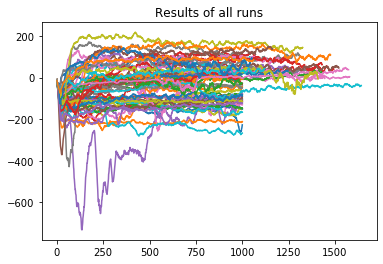

In [33]:
for k, v in d.items():
    plt.plot(v['data']['mean_reward_20_epochs'])
plt.title("Results of all runs")
plt.show()

In [34]:
# plot where a desire is on vs off.

In [ ]:
['desire_discounted_rew_to_go',
  'desire_cum_rew',
  'desire_horizon',
  'desire_state',
  'desire_advantage']

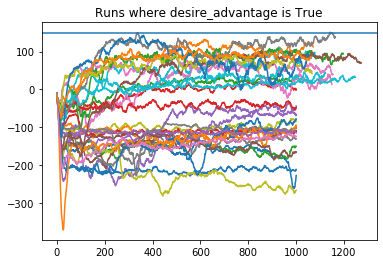

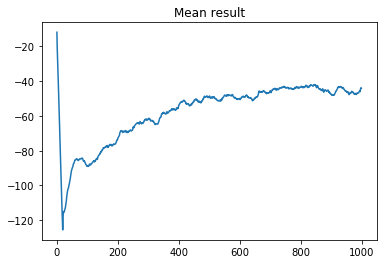

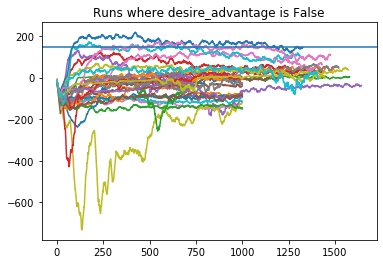

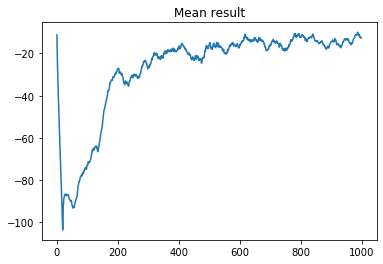

In [52]:
on_off_desire = 'desire_advantage'

for tf in [True, False]:

    to_mean = np.zeros(1000)
    for k, v in d.items():
        if v['params'][on_off_desire] is tf: 
            plt.plot(v['data']['mean_reward_20_epochs'])
            to_mean += v['data']['mean_reward_20_epochs'][:1000]
    plt.title("Runs where " + on_off_desire + " is "+str(tf))
    plt.axhline(150)
    plt.show()

    plt.plot(np.arange(1000), to_mean/31)
    plt.title("Mean result")
    plt.show()


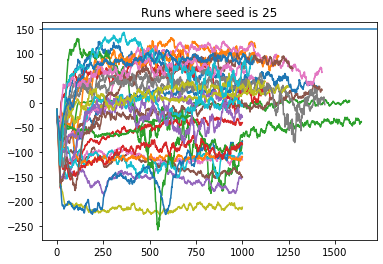

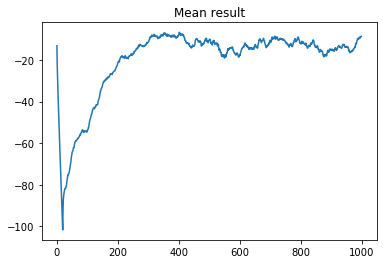

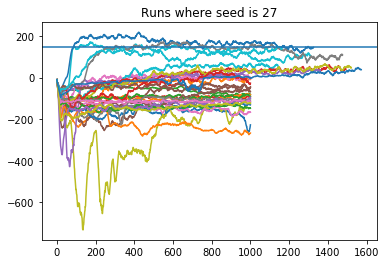

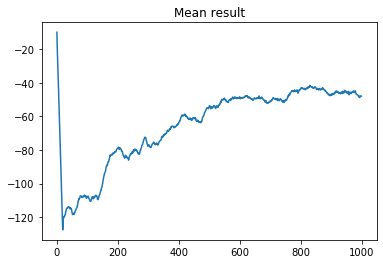

In [48]:
on_off_desire = 'seed'

for tf in [25, 27]:

    to_mean = np.zeros(1000)
    for k, v in d.items():
        if v['params'][on_off_desire] is tf: 
            plt.plot(v['data']['mean_reward_20_epochs'])
            to_mean += v['data']['mean_reward_20_epochs'][:1000]
    plt.title("Runs where " + on_off_desire + " is "+str(tf))
    plt.axhline(150)
    plt.show()

    plt.plot(np.arange(1000), to_mean/31)
    plt.title("Mean result")
    plt.show()


In [ ]:
# Plot the means across seeds

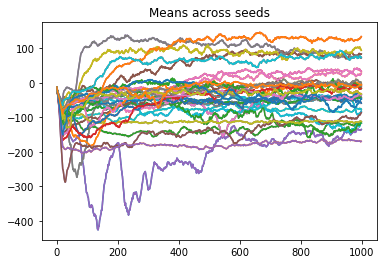

In [97]:

seed_means = []

for k, v in d.items():
    to_mean = np.zeros(1000)
    to_mean += v['data']['mean_reward_20_epochs'][:1000]
    for k2, v2 in d.items():
        matches = True
        for des in ['desire_discounted_rew_to_go',
                      'desire_cum_rew',
                      'desire_horizon',
                      'desire_state',
                      'desire_advantage']:
            if v['params'][des] is not v2['params'][des]:
                matches=False
                break
                
        if matches and v['params']['seed']!= v2['params']['seed']:
            #print('running with', k, 'adding the mean from', k2)
            to_mean += v2['data']['mean_reward_20_epochs'][:1000]
    to_mean = to_mean/2
    
    temp = []
    for des in ['desire_discounted_rew_to_go',
                      'desire_cum_rew',
                      'desire_horizon',
                      'desire_state',
                      'desire_advantage']:
        temp.append( v['params'][des]  )
    temp.append(to_mean.iloc[-1])
    seed_means.append(temp )
    
    plt.plot(np.arange(1000),to_mean)
    
plt.title("Means across seeds")
plt.show()


In [98]:
cols = ['desire_discounted_rew_to_go',
                      'desire_cum_rew',
                      'desire_horizon',
                      'desire_state',
                      'desire_advantage']
cols.append('final_mean_rew')
seed_means = pd.DataFrame(seed_means, columns =cols )
seed_means

,desire_discounted_rew_to_go,desire_cum_rew,desire_horizon,desire_state,desire_advantage,final_mean_rew
0,True,False,True,False,True,-81.675611
1,True,False,True,False,False,-6.469413
2,False,True,False,True,False,-41.939880
3,False,True,False,False,False,-31.673109
4,True,False,True,True,False,73.858848
...,...,...,...,...,...,...
57,False,True,True,True,True,-1.469347
58,False,True,False,False,False,-31.673109
59,True,False,False,True,True,73.481520
60,True,True,True,True,True,-45.641107


In [101]:
seed_means.sort_values('final_mean_rew', ascending=False)

,desire_discounted_rew_to_go,desire_cum_rew,desire_horizon,desire_state,desire_advantage,final_mean_rew
51,False,False,True,True,False,134.231575
33,False,False,True,True,False,134.231575
31,True,False,False,True,False,94.542957
38,True,False,False,True,False,94.542957
15,True,False,False,False,True,83.706262
...,...,...,...,...,...,...
39,True,False,True,True,True,-116.311586
14,True,True,True,True,False,-134.896185
10,True,True,True,True,False,-134.896185
54,True,True,True,False,True,-169.141497


In [104]:
seed_means.drop_duplicates(subset=['desire_discounted_rew_to_go',
                      'desire_cum_rew',
                      'desire_horizon',
                      'desire_state',
                      'desire_advantage']).shape

(31, 6)

In [87]:
to_mean.iloc[-1]

-81.67561100482925

In [62]:
desire_advantage=True,desire_cum_rew=False,desire_discounted_rew_to_go=True,desire_horizon=True,desire_state=Fals

True

In [74]:
for k2, v2 in d.items():
    match = True
    for des, b in zip(['desire_discounted_rew_to_go',
                  'desire_cum_rew',
                  'desire_horizon',
                  'desire_state',
                  'desire_advantage'], [True, False, True, False, True]):
        
        if v2['params'][des] is not b:
            match=False
    if match:
        print(k2, 'matches')

50 matches
18 matches
